In [6]:
!pip install deepface

In [7]:
!ls /content/drive/MyDrive/PersianFaces

Adel_FerdowsiPour  Dariush_Arjmand	Hootan_Shakiba	   Mohsen_Chavoshi    Siavash_Ghomayshi
Ali_Daei	   Ebi			Javad_Khiabani	   Parinaz_Izadyar    Tannaz_Tabatabaee
Ali_Khamenei	   Ehsan_Alikhani	Javad_Razavian	   Parsa_Pirozfar     Taraneh_Alidoosti
Asghar_Farhadi	   Elham_Hamidi		Leyla_Hatami	   Parviz_Parastooee
Bahare_Rahnama	   Elnaz_Shakerdoost	Mahnaz_Afshar	   Sahar_Dolarshahi
Bahram_Radan	   Golshifteh_Farahani	Mehran_Ghafourian  Shahab_Hosseini
Behnam_Bani	   Hamid_Lolaei		Mehran_Modiri	   Siamak_Ansari


In [8]:
import pandas as pd
import cv2 as cv
import os
from deepface import DeepFace

In [9]:
def generate_dataset(dataset_path: str, save_data: bool = True, dataset_name_to_save: str = "extracted_features.csv") -> pd.DataFrame | None:
    subjects_list = os.listdir(dataset_path)
    subject_feature = {}
    all_features = []

    for subject in subjects_list:
        print(f"{subject}...")
        for image in os.listdir(f"{dataset_path}/{subject}"):
            try:
              encoded_features = DeepFace.represent(img_path=os.path.join(
                  dataset_path, subject, image), model_name="ArcFace", enforce_detection=False)
              subject_feature['subject'] = subject
              for i in range(len(encoded_features[0]['embedding'])):
                  subject_feature[f'feature{i + 1}'] = encoded_features[0]['embedding'][i]
              all_features.append(subject_feature.copy())
              subject_feature = {}

            except ValueError:
              print(f"the {image} has non-english characters!")

    data = pd.DataFrame(all_features)

    if save_data:
        data.to_csv(dataset_name_to_save, index=False)
    else:
        return data

In [10]:
generate_dataset("/content/drive/MyDrive/PersianFaces", True, "/content/drive/MyDrive/persian_faces.csv")

Asghar_Farhadi...
the اصغر+فرهادی-0.jpg has non-english characters!
the اصغر-فرهادی-0.jpg has non-english characters!
the اصغر-فرهادی-2-0.jpg has non-english characters!
Adel_FerdowsiPour...
the عادل+فردوسی+پور (1)-0 (1).jpg has non-english characters!
the عادل+فردوسی+پور (1)-0.jpg has non-english characters!
the عادل+فردوسی+پور (2)-0 (1).jpg has non-english characters!
the عادل+فردوسی+پور (2)-0.jpg has non-english characters!
the عادل+فردوسی+پور (3)-0 (1).jpg has non-english characters!
the عادل+فردوسی+پور-0 (1).jpg has non-english characters!
the عادل+فردوسی+پور-0.jpg has non-english characters!
the عادل+فردوسی+پور (3)-0.jpg has non-english characters!
the عادل+فردوسی_پور-0 (1).jpg has non-english characters!
the عادل+فردوسی_پور-0.jpg has non-english characters!
the عادل-فردوسی-پور (3)-1.jpg has non-english characters!
the عادل-فردوسی-پور (5)-0.jpg has non-english characters!
the عادل-فردوسی-پور (6)-0 (1).jpg has non-english characters!
the عادل-فردوسی-پور (6)-0.jpg has non-english c

In [14]:
data = pd.read_csv("/content/drive/MyDrive/persian_faces.csv")
data.head()

,subject,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,Asghar_Farhadi,0.038941,0.178468,-0.009596,-0.346168,-0.020121,-0.119670,0.006319,0.022601,-0.067702,...,-0.202443,0.118020,-0.123836,-0.126426,0.089901,0.050935,0.163173,0.284566,0.128719,-0.037637
1,Asghar_Farhadi,0.016507,-0.178618,0.048744,0.065089,0.033210,-0.062102,0.291551,0.103106,-0.116582,...,0.214809,-0.397263,-0.011620,0.343433,0.276162,0.017462,-0.115681,-0.029530,-0.018054,-0.188469
2,Asghar_Farhadi,-0.031760,-0.196878,-0.055418,0.006825,-0.041261,-0.028886,0.109129,0.121888,-0.140051,...,0.163607,-0.426219,0.190829,0.092292,0.114531,0.102194,-0.107319,0.034361,0.044175,-0.237664
3,Asghar_Farhadi,0.111689,-0.075742,-0.196296,-0.134234,-0.008348,-0.046939,0.023592,-0.041653,-0.118601,...,0.159049,-0.127021,0.030810,-0.039031,0.208177,-0.023238,-0.121285,0.010861,0.182330,-0.143061
4,Asghar_Farhadi,0.035600,0.125698,0.012296,-0.218344,-0.057729,0.080512,0.024677,-0.162810,-0.079439,...,0.037698,0.051254,0.060149,0.023578,0.059000,0.091558,0.018321,0.294954,0.038576,0.037511


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu, sigmoid, softmax
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [16]:
enc = OneHotEncoder()

X = data.drop(['subject'], axis=1)
Y = data['subject'].to_frame()

enc.fit(Y)
subjects = enc.transform(Y).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, subjects, test_size=.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1184, 512) (297, 512) (1184, 31) (297, 31)


In [24]:
model = Sequential([
    Dense(len(x_train.columns), activation=relu),
    Dense(256, activation=relu),
    Dropout(.2),
    Dense(128, activation=sigmoid),
    Dropout(.2),
    Dense(y_train.shape[1], activation=softmax)
])

In [ ]:
model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=45)

Epoch 1/45
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 2.9584e-04
Epoch 2/45
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 4.5817e-04
Epoch 3/45
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 3.9741e-04
Epoch 4/45
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 6.5573e-04
Epoch 5/45
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 2.8186e-04
Epoch 6/45
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 3.3440e-04
Epoch 7/45
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 2.8626e-04
Epoch 8/45
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 3.9221e-04
Epoch 9/45
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 5.3005e-04
Epoch 10/45
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 4.0113e-04
Epoch 11/45
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 4.1098e-04
Epoch 12/45
37/37 ━━━━━━━━━━

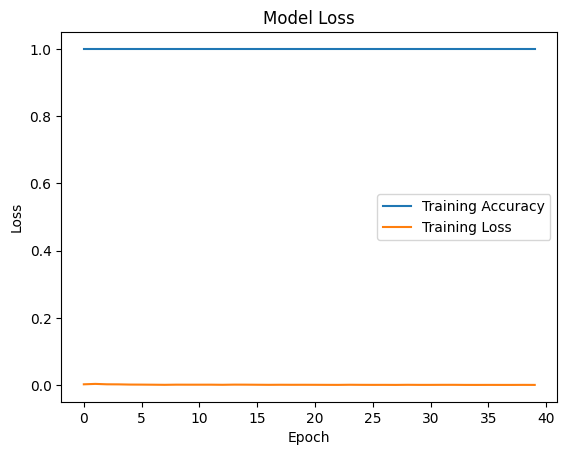

In [54]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['loss'], label="Training Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

In [43]:
model.evaluate(x_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8739 - loss: 0.9041 


[0.8789671659469604, 0.868686854839325]

In [44]:
model.save("/content/drive/MyDrive/PersianFaces.keras")

In [45]:
Asghar_Farhadi = cv.imread("/content/drive/MyDrive/PersianFaces/Asghar_Farhadi/000_9EY82V-0.jpg")

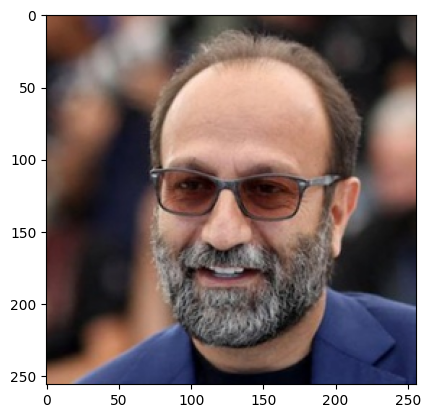

In [46]:
plt.imshow(cv.cvtColor(Asghar_Farhadi, cv.COLOR_BGR2RGB))
plt.show()

In [47]:
encoded_Asghar = DeepFace.represent(img_path="/content/drive/MyDrive/PersianFaces/Asghar_Farhadi/000_9EY82V-0.jpg", model_name="ArcFace")

In [48]:
Asghar_features = np.asarray(encoded_Asghar[0]["embedding"])
Asghar_features = Asghar_features.reshape(-1, 512)
print(Asghar_features.shape)

(1, 512)


In [49]:
prediction = np.argmax(model.predict(Asghar_features))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3


In [50]:
subjects = [subject for subject in os.listdir("/content/drive/MyDrive/PersianFaces")]
subjects = sorted(subjects)
subjects

['Adel_FerdowsiPour',
 'Ali_Daei',
 'Ali_Khamenei',
 'Asghar_Farhadi',
 'Bahare_Rahnama',
 'Bahram_Radan',
 'Behnam_Bani',
 'Dariush_Arjmand',
 'Ebi',
 'Ehsan_Alikhani',
 'Elham_Hamidi',
 'Elnaz_Shakerdoost',
 'Golshifteh_Farahani',
 'Hamid_Lolaei',
 'Hootan_Shakiba',
 'Javad_Khiabani',
 'Javad_Razavian',
 'Leyla_Hatami',
 'Mahnaz_Afshar',
 'Mehran_Ghafourian',
 'Mehran_Modiri',
 'Mohsen_Chavoshi',
 'Parinaz_Izadyar',
 'Parsa_Pirozfar',
 'Parviz_Parastooee',
 'Sahar_Dolarshahi',
 'Shahab_Hosseini',
 'Siamak_Ansari',
 'Siavash_Ghomayshi',
 'Tannaz_Tabatabaee',
 'Taraneh_Alidoosti']